# 1. Introduction

The cost of healthcare can vary greatly between individuals. The data set Medical Cost Personal Datasets from Kaggle (https://www.kaggle.com/mirichoi0218/insurance) records the charges accrued by each patient’s insurance and gives other metrics and categories for each patient that may or may not contribute to the amount of charges accrued.

The data I am most interested in are the "smoker" and "charges" columns which tell us whether or not the patient is a smoker and the amount of insurance charges the patient has accrued.

# 2. Hypothesis

The null and alternative hypotheses are as follows:
>*h<sub>o<sub/>*: There is no difference between the means of charges for smokers and non-smokers.

>*h<sub>a<sub/>*: There is a significant difference between the means of charges for smokers and non-smokers

I will test these hypotheses by obtaining a p-value and confidence level using Python and Python libraries, specifically Pandas (for data cleaning and analysis) and Seaborn (for visuals).

# 3. Data

The data are categorized by age, sex, and region. Other features, such as the "children" column tells us the number of children who are covered by the insurance. The data also tells us their BMI (Body Mass Index), which is an indicator of obesity or underweightness as a ratio of height and weight. 
  
One potential limiter to the data is that there is no indication as to the time frame of the charges. We are assuming that the charges are all over a uniform amount of time (i.e. a year). Should it be the case that this dataset does not use a singular amount of time, this would mean that any significance tests would be invalid.
    
I will begin by importing the libraries and loading the data.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import math

In [2]:
data = pd.read_csv('insurance.csv')
# If you are running this notebook on your own machine, please visit the following link
# https://www.kaggle.com/mirichoi0218/insurance?select=insurance.csv
# Download it and use the file path instead of 'insurance.csv'

I will show the first five rows to get an idea of the layout of the DataFrame. 

In [21]:
data.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


# 4. Methods

For this analysis I will explore the differences between the patients who are smokers and the ones who are not smokers. The goal is to demonstrate that there is a significant difference in the medical charges accrued by each group.

I will check to see if there are missing values.

In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values, which will make analysis a bit easier.

Next, I split the data into two categories:
Smokers and Non-smokers

In [5]:
smokers = data[data['smoker'] == 'yes']
non_smokers = data[data['smoker'] == 'no']

Let's take a look at how the data are distributed in the charges column for smokers and non_smokers

In [6]:
print('--------------smokers: \n', stats.describe(smokers.charges))
print('--------------non-smokers: \n', stats.describe(non_smokers.charges))

--------------smokers: 
 DescribeResult(nobs=274, minmax=(12829.4551, 63770.42801), mean=32050.23183153284, variance=133207311.20634924, skewness=0.127514285857385, kurtosis=-1.0395337984245219)
--------------non-smokers: 
 DescribeResult(nobs=1064, minmax=(1121.8739, 36910.60803), mean=8434.268297856204, variance=35925420.49611173, skewness=1.5359507841880067, kurtosis=3.1288070753114896)


Based on the description of the data alone, we can see that there are a lot more non-smokers than smokers. Also, the skewness and kurtosis make me think that the data are not normally distributed.

Next, I will visualize the data using a violin plot with the means shown as horizontal lines. The white dots at the center of the violin plots are the medians of the datasets.

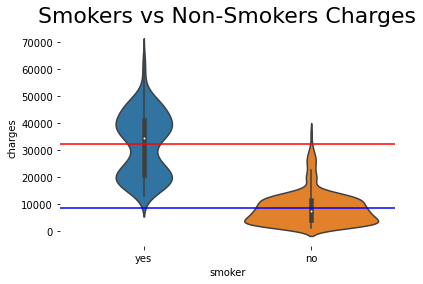

In [20]:
ax = sns.violinplot(x=data.smoker, y=data.charges)
plt.axhline(smokers.charges.mean(), color='r')
plt.axhline(non_smokers.charges.mean(), color='b')
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
plt.title("Smokers vs Non-Smokers Charges", fontsize=22)
plt.savefig('smokers_vs_nonsmokers.jpeg')
plt.show()


After looking at the distributions of the charges for smokers and non-smokers, I determined that the smoker data appears to be approximately normal. However, the non-smoker data does not appear normal. Because of this, I decided to run a Shapiro-Wilk test to determine if the data are normal.

In [8]:
print('smokers:', stats.shapiro(smokers['charges']))
print('non-smokers:', stats.shapiro(non_smokers['charges']))

smokers: ShapiroResult(statistic=0.9395521879196167, pvalue=3.6251879276250065e-09)
non-smokers: ShapiroResult(statistic=0.8728628158569336, pvalue=1.4455900162299346e-28)


The Shapiro-Wilk test returned p-values under 0.05 for both sets of data, rejecting the null hypothesis that the data are normal. 

Since both the charges for smokers and non-smokers are not normal, I will conduct a Kruskal-Wallis Test to obtain a p-value at the 95% confidence level.

In [9]:
stats.kruskal(smokers.charges, non_smokers.charges)

KruskalResult(statistic=588.5196583657973, pvalue=5.259018267498522e-130)

The Kruskal-Wallis Test calculated a p-value that is much smaller than 0.05. We can reject the null hypothesis that there is not a significant difference between the means of charges for smokers and non-smokers.

At the 95% confidence level we can say that the means are significantly different. 

So how different are they?

I will create a function that calculates the 95% confidence interval.

In [10]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

In [11]:
get_95_ci(non_smokers.charges, smokers.charges)

'The difference in means at the 95% confidence interval (two-tail) is between 22202.692675635477 and 25029.234391717826.'

The confidence interval says that there is a 95% chance that the difference in means will fall between the two numbers.

Next, I will calculate the means and take the difference.

In [12]:
mean_diff = smokers.charges.mean() - non_smokers.charges.mean()
print(f'The difference between the mean of charges for smokers and non-smokers is approximately {round(mean_diff,2)}')

The difference between the mean of charges for smokers and non-smokers is approximately 23615.96


I will use a lineplot to visualize the difference between the data for smokers and non-smokers. I will do this by using the patient's age as the independent variable.

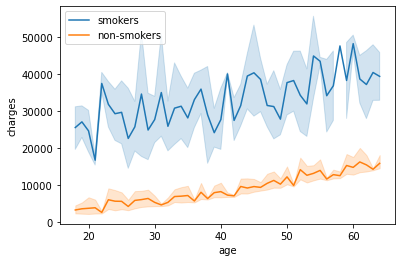

In [13]:
sns.lineplot(x='age', y='charges', data=smokers)
sns.lineplot(x='age', y='charges', data=non_smokers)
plt.legend(('smokers', 'non-smokers'))
plt.show()

There seems to be a lot of variability in the data for smokers. This could be due to another factor that we are not testing for. Perhaps the disparity is the cause of the difference in BMI within each group. However, we can still clearly visualize that the entire smoker dataset sits at a higher place in the graph.

# 5. Results Summary

Upon inspection of the data mathematically and visually, it was determined that the distributions of charges for smokers and non-smokers were non-normal. It was established that there was a significant difference between the means of the two groups. A p-value of < 0.05 and a confidence interval of 95% was calculated and was inspected visually.

The p-value and confidence interval tells us that we can trust the difference of the means to be significant enough to make business decisions based on those values.

# 6. Discussion and recommendation

Now that we have concluded that there is a significant difference between the medical charges accrued by smokers and non-smokers, we can begin to look at what this may mean as a business strategy to increase revenue.